<a href="https://colab.research.google.com/github/nassma2019/PracticalSessions/blob/master/introductory/Intro_Numpy_And_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

" NumPy is the fundamental package for scientific computing with Python.  It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* useful linear algebra, Fourier transform, and random number capabilities "


-- From the [NumPy](http://www.numpy.org/) landing page.



Before learning about numpy, we introduce..

### The NXOR Function

Many of the exercises involve working with the  $\mathrm{NXOR} \colon \; [-1, 1]^2  \rightarrow \{-1, +1\}$ function defined as 

$$ (x_1, x_2) \longmapsto \mathrm{sgn}(x_1 \cdot x_2) .$$

where for $x_1 \cdot x_2 = 0$ we let $\mathrm{NXOR}(x_1, x_2) = -1$.

We can visualize this function as

![A set of points in \[-1, +1\]^2 with green and red markers denoting the value assigned to them by the NXOR function](https://github.com/tmlss2018/PracticalSessions/blob/master/assets/nxor_labels.png?raw=true)

where each point in $ [-1, 1]^2$ is marked by green (+1) or red (-1) according to the value assigned to it by the NXOR function.





Over the course of the intro lab exercises we will

1. Generate such data with numpy.
2. Create the plot above with matplotlib.
3. Train a model to learn this function.


### Setup and imports. Run the following cell.

In [1]:
import numpy as np

### Random numbers in numpy

In [2]:
np.random.random((3, 2))  # Array of shape (3, 2), entries uniform in [0, 1).

array([[0.30306603, 0.96058717],
       [0.59019758, 0.79387638],
       [0.53665133, 0.01697878]])

Note that (as usual in computing) numpy produces pseudo-random numbers based on a seed, or more precisely a random state. In order to make random sequences and calculations based on reproducible, use

* the [`np.random.seed()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html) function to set the default global seed, or
* the [`np.random.RandomState`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html) class which is a container for a pseudo-random number generator and exposes methods for generating random numbers.


In [3]:
np.random.seed(0)
print(np.random.random(2))
# Reset the global random state to the same state.
np.random.seed(0)
print(np.random.random(2))

[0.5488135  0.71518937]
[0.5488135  0.71518937]


### Numpy Array Operations 1

There are a large number of operations you can run on any numpy array. Here we showcase some common ones.

In [4]:
# Create one from hard-coded data:
ar = np.array([
    [0.0, 0.2],
    [0.9, 0.5],
    [0.3, 0.7],
], dtype=np.float64)  # float64 is the default.

print('The array:\n', ar)
print()

print('data type', ar.dtype)
print('transpose\n', ar.T)
print('shape', ar.shape)
print('reshaping an array', ar.reshape((6)))



The array:
 [[0.  0.2]
 [0.9 0.5]
 [0.3 0.7]]

data type float64
transpose
 [[0.  0.9 0.3]
 [0.2 0.5 0.7]]
shape (3, 2)
reshaping an array [0.  0.2 0.9 0.5 0.3 0.7]


Many numpy operations are available both as np module functions as well as array methods. For example, we can also reshape as

In [5]:
print('reshape v2', np.reshape(ar, (6, 1)))

reshape v2 [[0. ]
 [0.2]
 [0.9]
 [0.5]
 [0.3]
 [0.7]]


### Numpy Indexing and selectors

Here are some basic indexing examples from numpy.

In [6]:
ar

array([[0. , 0.2],
       [0.9, 0.5],
       [0.3, 0.7]])

In [7]:
ar[0, 1]  # row, column

0.2

In [8]:
ar[:, 1]  # slices: select all elements across the first (0th) axis.

array([0.2, 0.5, 0.7])

In [9]:
ar[1:2, 1]  # slices with syntax from:to, selecting [from, to).

array([0.5])

In [10]:
ar[1:, 1]  # Omit `to` to go all the way to the end

array([0.5, 0.7])

In [11]:
ar[:2, 1]  # Omit `from` to start from the beginning

array([0.2, 0.5])

In [12]:
ar[0:-1, 1]  # Use negative indexing to count elements from the back.

array([0.2, 0.5])

We can also pass boolean arrays as indices. These will exactly define which elements to select.

In [13]:
ar[np.array([
    [True, False],
    [False, True],
    [True, False],
])]

array([0. , 0.5, 0.3])

Boolean arrays can be created with logical operations, then used as selectors. Logical operators apply elementwise.

In [14]:
ar_2 = np.array([   # Nearly the same as ar
    [0.0, 0.1],
    [0.9, 0.5],
    [0.0, 0.7],
])

# Where ar_2 is smaller than ar, let ar_2 be -inf.
ar_2[ar_2 < ar] = -np.inf
ar_2

array([[ 0. , -inf],
       [ 0.9,  0.5],
       [-inf,  0.7]])

### Numpy Operations 2

In [15]:
print('array:\n', ar)
print()

print('sum across axis 0 (rows):', ar.sum(axis=0))
print('mean', ar.mean())
print('min', ar.min())
print('row-wise min', ar.min(axis=1))


array:
 [[0.  0.2]
 [0.9 0.5]
 [0.3 0.7]]

sum across axis 0 (rows): [1.2 1.4]
mean 0.43333333333333335
min 0.0
row-wise min [0.  0.5 0.3]


We can also take element-wise minimums between two arrays.

We may want to do this when "clipping" values in a matrix, that is, setting any values larger than, say, 0.6, to 0.6. We would do this in numpy with..

### Broadcasting (and selectors)

We will briefly see some examples of broadcasting, but feel free to see the references at the end of the notebook for more information.

In [16]:
np.minimum(ar, 0.6)

array([[0. , 0.2],
       [0.6, 0.5],
       [0.3, 0.6]])

Numpy automatically turns the scalar 0.6 into an array the same size as `ar` in order to take element-wise minimum.



Here we follow with a selection of other useful broadcasting examples.


In [17]:
# Centering our array.
print('centered array:\n', ar - np.mean(ar)) 

centered array:
 [[-0.43333333 -0.23333333]
 [ 0.46666667  0.06666667]
 [-0.13333333  0.26666667]]


Note that `np.mean()` was a scalar, but it is automatically subtracted from every element.


Vectors may also be broadcast into matrices.

In [18]:
vec = np.array([1, 2])
ar + vec

array([[1. , 2.2],
       [1.9, 2.5],
       [1.3, 2.7]])

If there is a shape mismatch, you will be informed. To try, uncomment the line below and run it.

In [19]:
#ar + np.array([[1, 2, 3]])

Broadcasting can save us a lot of typing, but in complicated cases it may require a good understanding of the exact rules followed.

Some references around broadcasting (not necessary for the needs of this lab):

* [Numpy page that explains broadcasting](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html)
* [Similar content with some visualizations](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)

Now you know more than enough to generate some example data for our `NXOR` function.

### Exercise: Generate Data for NXOR

Write a function `get_data(num_examples)` that returns two numpy arrays

* `inputs` of shape  `num_examples x 2` with points selected uniformly from the $[-1, 1]^2$ domain.
* `labels` of shape `num_examples` with the associated output of `NXOR`.

In [20]:
#@title Code

def get_data(num_examples):
  # Replace with your code.
  return np.zeros((num_examples, 2)), np.zeros((num_examples))


In [21]:
#@title Solution

# Solution 1.
def get_data(num_examples):
  inputs = 2*np.random.random((num_examples, 2)) - 1
  labels = np.prod(inputs, axis=1)
  labels[labels <= 0] = -1 
  labels[labels > 0] = 1 
  return inputs, labels

# Solution 1.
# def get_data(num_examples):
#   inputs = 2*np.random.random((num_examples, 2)) - 1
#   labels = np.sign(np.prod(inputs, axis=1))
#   labels[labels == 0] = -1 
#   return inputs, labels


In [22]:
get_data(4)

(array([[ 0.20552675,  0.08976637],
        [-0.1526904 ,  0.29178823],
        [-0.12482558,  0.783546  ],
        [ 0.92732552, -0.23311696]]), array([ 1., -1., -1., -1.]))

# Plotting with matplotlib + more numpy

We will use [matplotlib](https://matplotlib.org/) to

* make scatter plots
* plot of (training) curves
* show images.

There are many good tutorials for these on the internet, so we keep it short here with annotated full examples.


In [23]:
#@title Setup and Imports. Run this cell.

import random
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

sns.set_style('ticks')


def get_data(num_examples):
  inputs = 2*np.random.random((num_examples, 2)) - 1
  labels = np.prod(inputs, axis=1)
  labels[labels <= 0] = -1 
  labels[labels > 0] = 1 
  return inputs, labels


The import corresponding to matplotlib is `from matplotlib import pyplot as plt` and it will be used as `plt.some_function()`.


We start by **recreating the visualization of the NXOR function** introduced in the numpy colab.

In the same colab we wrote a function `get_data()` to generate numpy arrays with inputs and outputs of the NXOR function. In the setup cell above we redefined `get_data()`. Use it to generate a dataset of 100 examples.

In [24]:
inputs, labels = get_data(100)

### Scatter Plot

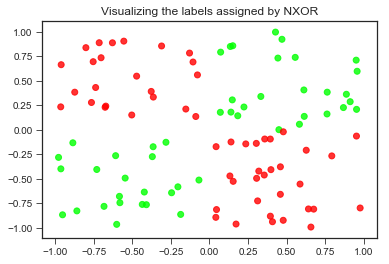

In [25]:
MARKER_COLORS = np.array([
    [1.0, 0.0, 0.0],  # red for -1 
    [0.0, 1.0, 0.0],  # green for +1
])
# Convert the labels to colors.
class_idx = (labels + 1 / 2.0).astype(np.int)

# Visualize the data.

plt.figure()
plt.title('Visualizing the labels assigned by NXOR')
plt.scatter(
    x=inputs[:, 0], y=inputs[:, 1], c=MARKER_COLORS[class_idx], alpha=0.8)

plt.savefig('nxor_data.png', bbox_inches='tight')  # Can save it, or
plt.show()  # More often just display it.

### Downloading matplotlib plots from colab

In [26]:
# If you would like to do this, uncomment and run the lines below.
# from google.colab import files
# files.download('nxor_data.png')

### Exercise: Make markers class dependent

Create a scatter plot like above, but use an 'o' marker for negative examples and 'x' marker for positive ones.

*Note:* it is not possible to pass markers like colors to `scatter`, instead you will have to call `scatter` twice, independently for each class. In this case you will also have to look up how to provide labels for data plotted.

In [27]:
#@title Code

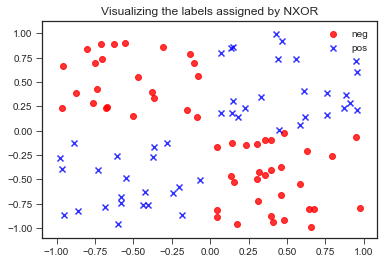

In [28]:
#@title Solution

neg_inputs = inputs[labels == -1]
pos_inputs = inputs[labels == 1]

plt.figure()
plt.title('Visualizing the labels assigned by NXOR')
plt.scatter(
    x=neg_inputs[:, 0], y=neg_inputs[:, 1], c='r',
    marker='o', alpha=0.8, label='neg')
plt.scatter(
    x=pos_inputs[:, 0], y=pos_inputs[:, 1], c='b',
    marker='x', alpha=0.8, label='pos')
plt.legend()

plt.show()

### Plotting Curves

Curves assign y-values to a sequence of x-values. Here we will show how to plot two different curves onto the same plot, so they can be compared.

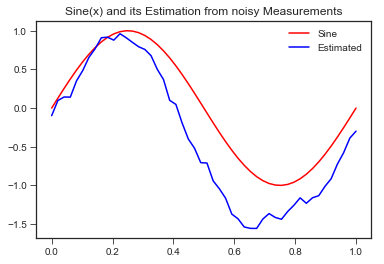

In [29]:
# Create [0, ..., 1] evenly spaced with 50 elements:
xs = np.linspace(start=0, stop=1, num=50)

y_real = np.sin(xs*2*np.pi)

# Pretend there is some noise at each timesteps.
err = np.random.normal(loc=0.0, scale=0.08, size=y_real.shape)
err = np.cumsum(err)  # Which adds up over time.
y_measured = y_real + err  # Yielding the final measured signal.


plt.figure()
plt.title('Sine(x) and its Estimation from noisy Measurements')
plt.plot(xs, y_real, c='r', label='Sine')
plt.plot(xs, y_measured, c='b', label='Estimated')
plt.legend()
plt.show()

### Exercise: plot another two curves

Plot the two new curves defined below.




In [30]:
xs = np.linspace(start=0, stop=1, num=50)
y_real = np.cos(xs*2*np.pi)
err = np.random.normal(loc=0.0, scale=0.02, size=xs.shape)
err = np.cumsum(err)
y_measured = np.cos((xs+err)*2*np.pi)


You can try modifying:

* colors
* data labels,
* plot title
* adding a legend,
* axes labels,
* setting axes limits.

In [31]:
#@title Your Code

## Your code here ##

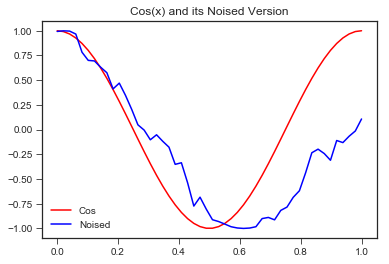

In [32]:
#@title Solution

plt.figure()
plt.title('Cos(x) and its Noised Version')
plt.plot(xs, y_real, c='r', label='Cos')
plt.plot(xs, y_measured, c='b', label='Noised')
plt.legend()
plt.show()

### Displaying images with matplotlib

`matplotlib` can display an array as an image. This will come in handy for displaying images our neural networks drew.



We don't have an image in array form here, so instead we will visualize the pdf of a bivariate normal distribution. The details of how this image is created (the next two cells) are not important.

#### Creating an image array

In [33]:
normal = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
# We can get the density of a number of points like so:
normal.pdf(np.array([[0, 0], [-10, 7], [1, 0.9]]))

array([1.59154943e-01, 7.02880071e-34, 6.43848407e-02])

In [34]:
# Define the grid of points over which the pdf is evaluated.
RANGE = 3
GRANULARITY = 30

x = np.linspace(-RANGE, RANGE, GRANULARITY)
y = np.linspace(-RANGE, RANGE, GRANULARITY)
XX, YY = np.meshgrid(x, y)

# Now (XX[i,j], YY[i,j]) give the x,y coordinates of points in the grid,
# create an array such that XY[i, j] = [x, y].
XY = np.stack([XX, YY], axis=-1)

probabilities = normal.pdf(XY)

#### Show the image

`probabilities` is now a 2D array with values corresponding to densities. We can display it in grayscale.



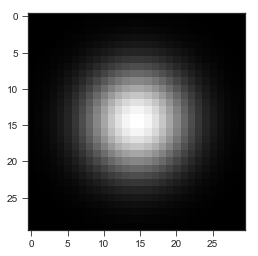

In [35]:
plt.gray()
plt.imshow(probabilities)
plt.show()

We can remove the axes and labels from the display for a cleaner look. Also note the difference in setting grayscale mode in the next cell.

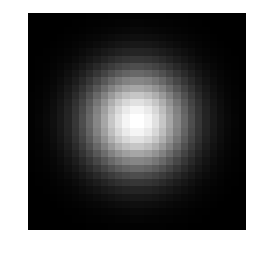

In [36]:
plt.axis('off')
plt.imshow(probabilities, cmap='gray')
plt.show()

### Exercise: make and display a coloured image

Display the image in red.

Helpful facts:

* `imshow()` takes arrays of size `n x m x 3` and interprets the last axis as an rgb channel.
* The largest value in `probabilities` was around `0.15`,  so unless you rescale your array the image will be dark.

The grayscale image plotting automatically rescaled the entries in the `probabilities` array!

In [37]:
#@title Your Code



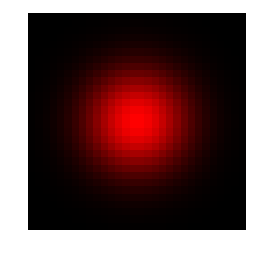

In [38]:
#@title Solution

# You may not have seen all calls in this solution.
# There are many ways to accomplish the same.

rescaled_probs = probabilities / np.max(probabilities)
red_image = np.zeros(list(probabilities.shape) + [3])
red_image[:, :, 0] = rescaled_probs

plt.axis('off')
plt.imshow(red_image)
plt.show()

### Showing a Grid of Images

We define a helper function to turn a batch of images into a grid. You do not need to care about its implementation, but check its documentation as you will use the same function later in this lab and other labs.

In [39]:
def gallery(array, ncols=10, rescale=True):
  """Take a batch of images and arrange them in a grid.
  
  Args:
    array: of shape batch_size x height x width x 3. The final x3 in the shape
      is optional.
    ncols: number of columns to have in the grid
    rescale: if true (default), increases the intensity of the images.
    
  Returns:
    A numpy array which contains the batch of images arranged into
    a grid.
  """
  if rescale:
    array = (array + 1.) / 2
  nindex, height, width = array.shape[:3]

  nrows = nindex//ncols
  assert nindex == nrows*ncols

  # want result.shape = (height*nrows, width*ncols, intensity?)
  abstract_grid_shape = [nrows, ncols, height, width]
  image_grid_shape = [height*nrows, width*ncols]
  if len(array.shape) == 4:
    intensity = array.shape[3]
    abstract_grid_shape.append(intensity)
    image_grid_shape.append(intensity)
 
  result = (array.reshape(*abstract_grid_shape)
            .swapaxes(1,2)
            .reshape(*image_grid_shape))
  return result


In order to showcase the use of this function, we make an array corresponding to a batch of images. For simplicity, our batch will just be 8 copies of the red image above.

**Before continuing let `red_image` denote the red image you created in the previous exercise.**

In [40]:
red_image = red_image  # Replace the second `red_image` by your red image

In [41]:
batch_of_images = np.stack([red_image] * 9, axis=0)
batch_of_images.shape

(9, 30, 30, 3)

### Exercise: Use the `gallery` helper function

To display the `batch_of_images` we just created in a 3x3 grid.

In [42]:
#@title Your Code

## Your code here ##

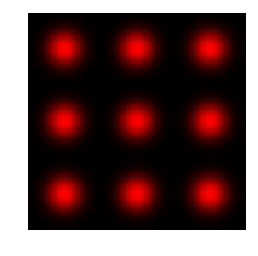

In [43]:
#@title Solution

plt.figure()
plt.axis('off')
plt.imshow(gallery(batch_of_images, ncols=3, rescale=False))
plt.show()

You may want to change the size of the figure, like so:

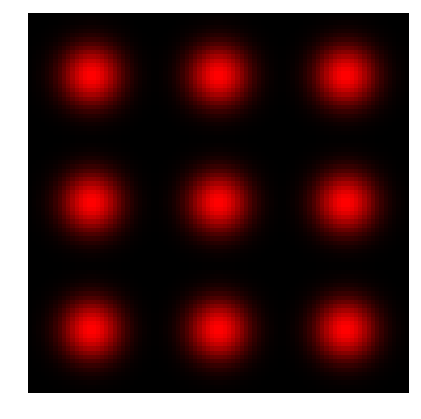

In [44]:
plt.figure(figsize=(7, 7))
plt.gray()
plt.axis('off')
plt.imshow(gallery(batch_of_images, ncols=3, rescale=False))
plt.show()

### Final Notes

`matplotlib` has many different types of plots and is really flexible. You can make any plot you can imagine with it. $^{TM}$.

#### Seaborn

The [seaborn](https://seaborn.pydata.org/) package is very good at making many standard, beautiful and potentially complex plots. We do not cover it here, though. You *may* have noticed that we imported it with `import seaborn as sns`: we use it for its style presets only. This was applied by running `sns.set_style('ticks')`.


## That's all, folks!

For now.